22/11/2019

The code here is close to Nielsen. Each activation is treated as a column vector, even the last one which for XOR is just a simple number and is encloded in a shape (1,1) column vector of just one row, i.e if activation value of output neuron is a, then it is computed as np.array([[a]]).

Can easily adapt code here for the MLP excercises and the Iris classification problem.
But you may need to use more than 2 hidden neurons and more than 1 output neuron.

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [118]:
def sigm(z):
    return  1.0/(1.0 + np.exp(-z))

def sigm_deriv(z):
    a = sigm(z)
    return a*(1 - a)

In [119]:
class XOR_MLP:
    def __init__(self):
        self.train_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
        self.train_outputs = np.array([0,1,1,0])
          
        np.random.seed(23)
        # hidden layer of 2 neurons
        self.w2 = np.random.randn(2,2)
        self.b2 = np.random.randn(2,1)
        
        # output layer has 1 neuron
        self.w3 = np.random.randn(1,2)
        self.b3 = np.random.randn(1,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    
    def backprop(self, xs, ys):   # Assumed here that input vectors are rows in xs
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):               # for zip to work, each x in xs must be a row vector
            a1 = x.reshape(2,1)              # convert input row vector x into (2,1) column vector
            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost

[[0.13441229 0.10816814 0.14522425 0.12453942]]
[[0.08467026 0.91859922 0.91853706 0.08963025]]


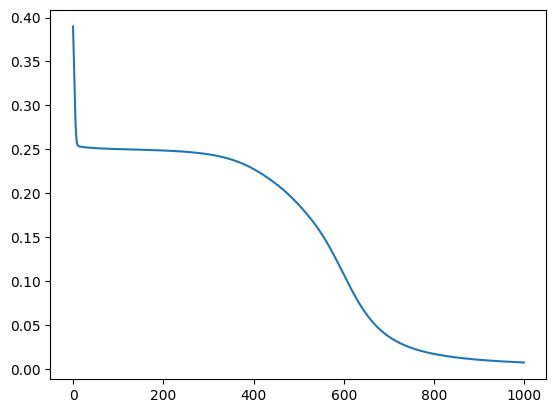

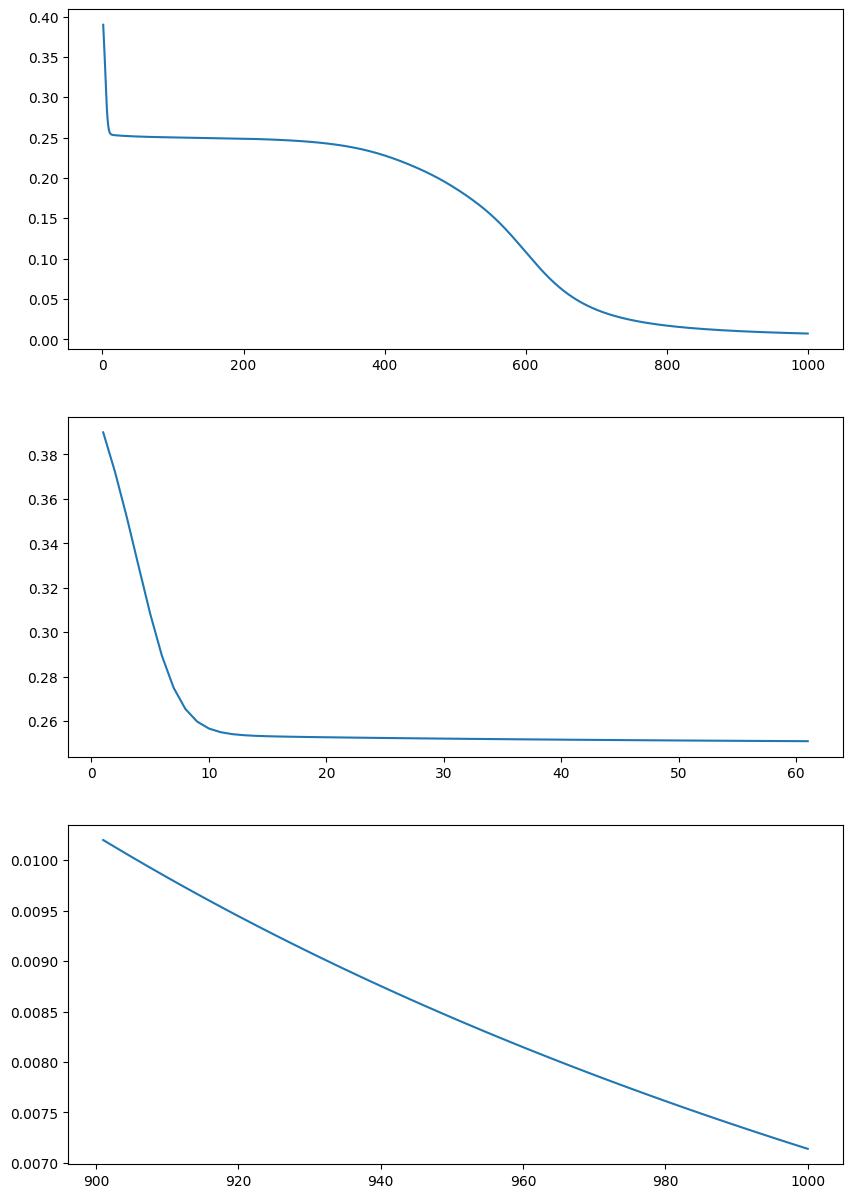

In [120]:
xor = XOR_MLP()
xs = xor.train_inputs.T

print(xor.feedforward(xs))

epochs = 1000
c = xor.train(epochs, 3.0)

print(xor.feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])

Exercise 1: copy and adapt the above XOR_MLP code so that it uses 3 neurons in the hidden layer. Train such a MLP and see if it learns faster than the previous one.

In [121]:
# Exercise 1
class XOR_MLP_COPY:
    def __init__(self):
        self.train_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
        self.train_outputs = np.array([0,1,1,0])
          
        np.random.seed(23)
        # hidden layer of 2 neurons
        self.w2 = np.random.randn(3,2)
        self.b2 = np.random.randn(3,1)
        
        # output layer has 1 neuron
        self.w3 = np.random.randn(1,3)
        self.b3 = np.random.randn(1,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    
    def backprop(self, xs, ys):   # Assumed here that input vectors are rows in xs
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):               # for zip to work, each x in xs must be a row vector
            a1 = x.reshape(2,1)              # convert input row vector x into (2,1) column vector
            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost

[[0.75101667 0.72275956 0.82197731 0.79600709]]
[[0.06170503 0.94737644 0.94695574 0.05410433]]


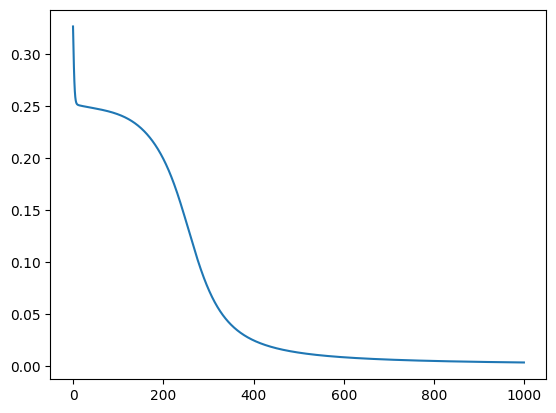

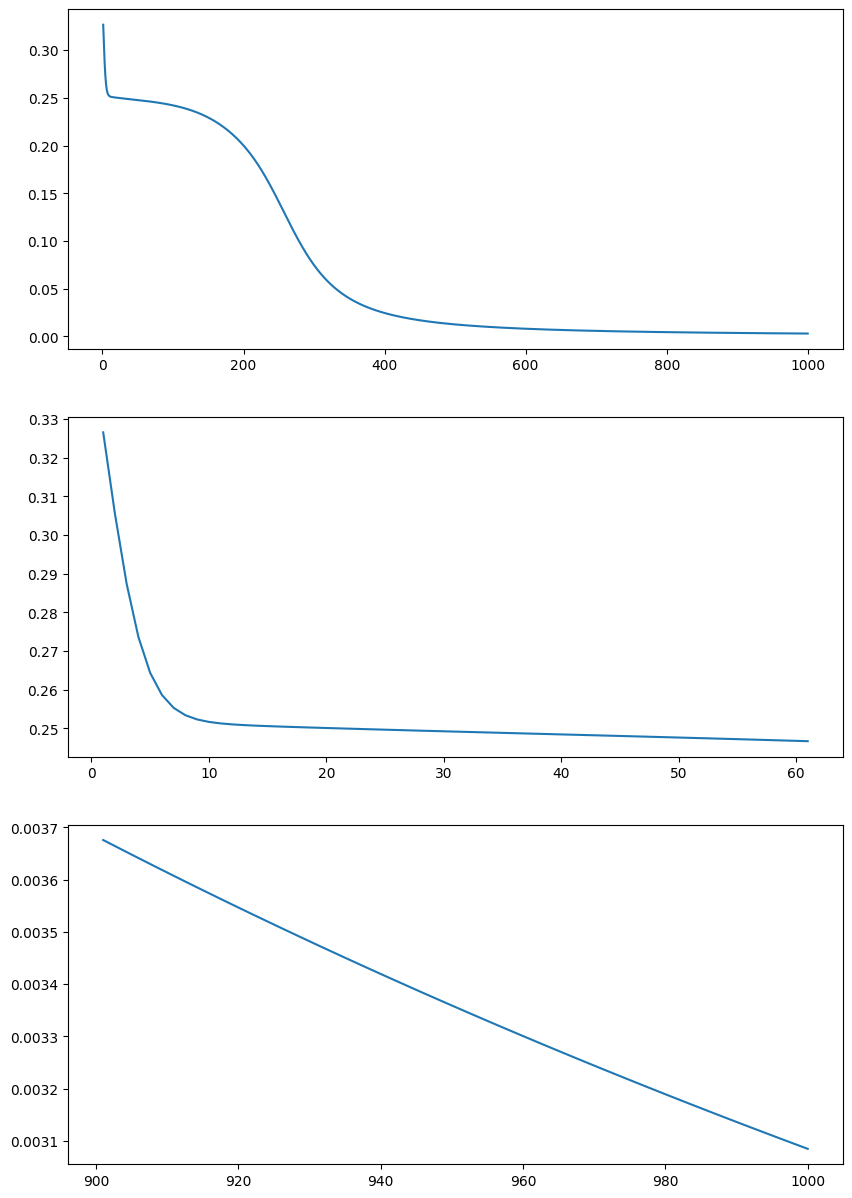

In [122]:
xor2 = XOR_MLP_COPY()
xs = xor2.train_inputs.T

print(xor2.feedforward(xs))
epochs = 1000
c = xor2.train(epochs, 3.0)
print(xor2.feedforward(xs))
x_axis = np.linspace(1, epochs, epochs, dtype=int)

fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])
plt.show()

In [123]:
# A more general purpose MLP with m input neurons, n hidden neurons and o output neurond
# You must complete this code yourself
class MLP:
    def __init__(self, m, n, o):
        self.m = m
        self.n = n
        self.o = o
          
        np.random.seed(23)
        # hidden layer of N neurons
        self.w2 = np.random.randn(n,m)
        self.b2 = np.random.randn(n,1)
        
        
        self.w3 = np.random.randn(o,n)
        self.b3 = np.random.randn(o,1)

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)   

        # Format the output for better readability
        formatted_output = self.format_output(a3s)
        return formatted_output         
    
    def backprop(self, xs, ys):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x, y in zip(xs,ys):            
            a1 = x.reshape(self.m, 1)        # convert input vector x into (2,1) column vector
            y = y.reshape(self.o, 1)         # convert output vector y into (1,1) column vector


            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            a2 = a2.reshape(self.n, 1)       # convert a2 into (2,1) column vector
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            a3 = a3.reshape(self.o, 1)       # convert a3 into (1,1) column vector

            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
    
    def predict(self, xs):
        return self.feedforward(xs)
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs, ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        plt.title('Loss Per Epochs/Iteration')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.show()
        return cost
                
    def format_output(self, output):
        formatted_output = "\n".join(
            ", ".join(f"{value:.4f}" for value in row) for row in output.T
        )
        return formatted_output

In [124]:
# MLP - Cross Entropy Cost Version
class MLP2:
    def __init__(self, m, n, o):
        self.m = m
        self.n = n
        self.o = o
          
        np.random.seed(23)
        # hidden layer of N neurons
        self.w2 = np.random.randn(n,m)
        self.b2 = np.random.randn(n,1)
        
        # output layer has O neurons but code is incorrect
        # code here needs to be modified
        self.w3 = np.random.randn(o,n)
        self.b3 = np.random.randn(o,1)

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)   
        # Format the output for better readability
        formatted_output = self.format_output(a3s)
        return formatted_output         
    
    def backprop(self, xs, ys):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x, y in zip(xs,ys):            
            a1 = x.reshape(self.m, 1)        # convert input vector x into (2,1) column vector
            y = y.reshape(self.o, 1)         # convert output vector y into (1,1) column vector

            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            a2 = a2.reshape(self.n, 1)       # convert a2 into (2,1) column vector
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            a3 = a3.reshape(self.o, 1)       # convert a3 into (1,1) column vector

            delta3 = (a3-y)               # Cross Entropy Cost    
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
    
    def predict(self, xs):
        return self.feedforward(xs)
        
    def train(self, epochs, eta):
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(self.train_inputs ,self.train_outputs)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        plt.title('Loss Per Epochs/Iteration')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.show()
        return cost
                
    def format_output(self, output):
        formatted_output = "\n".join(
            ", ".join(f"{value:.4f}" for value in row) for row in output.T
        )
        return formatted_output

In [125]:
# Are the outputs of these correct?
p1 = MLP(3,4,2)
print('\n W2 = \n',p1.w2, '\n W3 = \n', p1.w3, '\n')

p2 = MLP(4,6,3)
print('\n W2 = \n', p2.w2, '\nW3 = \n', p2.w3, '\n')


 W2 = 
 [[ 0.66698806  0.02581308 -0.77761941]
 [ 0.94863382  0.70167179 -1.05108156]
 [-0.36754812 -1.13745969 -1.32214752]
 [ 1.77225828 -0.34745899  0.67014016]] 
 W3 = 
 [[ 0.44173637  1.12887685 -1.83806777 -0.93876863]
 [-0.20184052  1.04537128  0.53816197  0.81211867]] 


 W2 = 
 [[ 0.66698806  0.02581308 -0.77761941  0.94863382]
 [ 0.70167179 -1.05108156 -0.36754812 -1.13745969]
 [-1.32214752  1.77225828 -0.34745899  0.67014016]
 [ 0.32227152  0.06034293 -1.04345    -1.00994188]
 [ 0.44173637  1.12887685 -1.83806777 -0.93876863]
 [-0.20184052  1.04537128  0.53816197  0.81211867]] 
W3 = 
 [[ 1.41531998  0.45771098  0.72887584  1.96843473 -0.54778801 -0.67941827]
 [-2.50623032  0.14696049  0.60619549 -0.02253889  0.01342226  0.93594489]
 [ 0.42062266  0.41161964 -0.07132392 -0.04543758  1.04088597 -0.09403473]] 




Before Training:
0.4322
0.5220
0.4316
0.5125


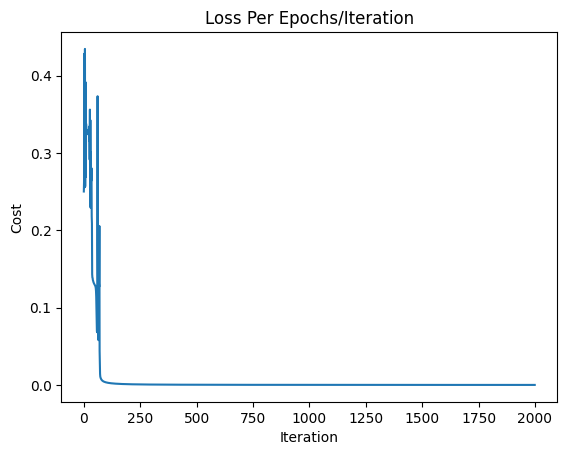


After Training:
0.0066
0.9894
0.9968
0.0075
Training with learning rate: 0.1


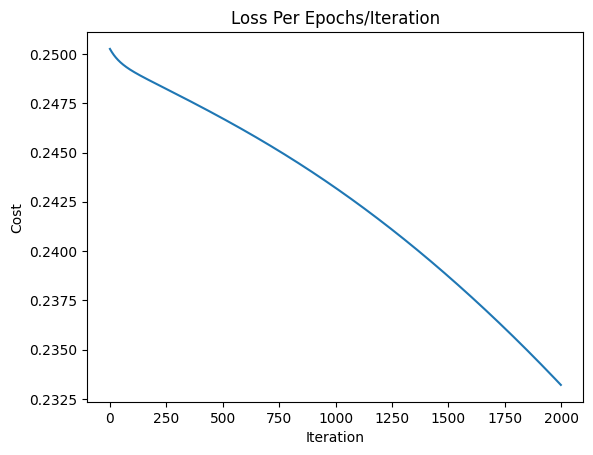


After Training:
0.4272
0.5737
0.4697
0.5360
Training with learning rate: 1.0


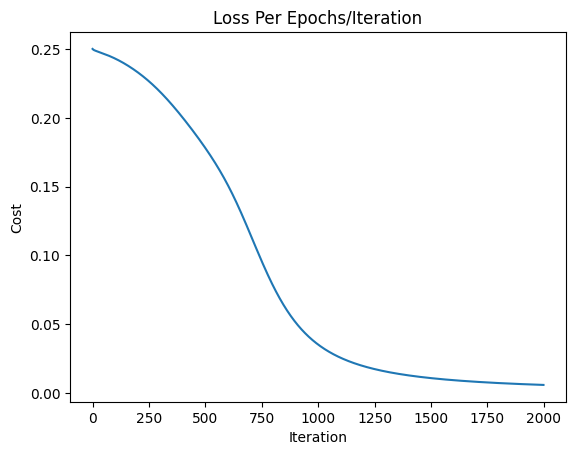


After Training:
0.0432
0.9253
0.9220
0.0973
Training with learning rate: 10.0


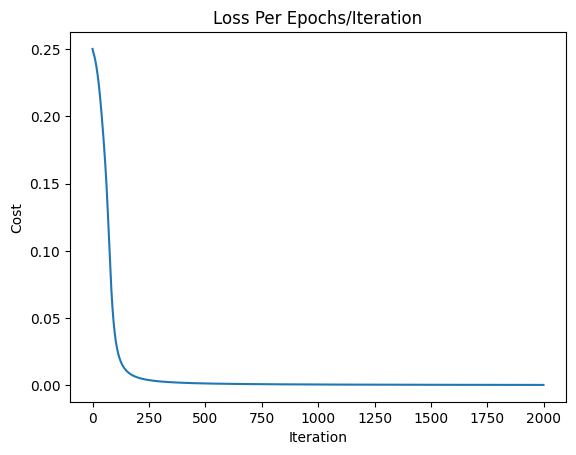


After Training:
0.0076
0.9833
0.9842
0.0208
Training with learning rate: 50.0


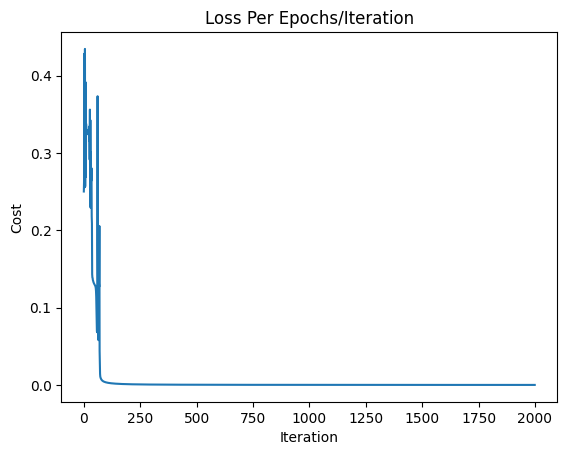


After Training:
0.0066
0.9894
0.9968
0.0075
Training with learning rate: 100.0


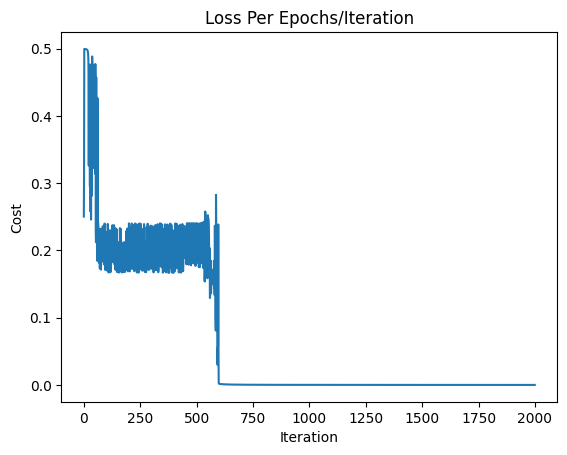


After Training:
0.0030
0.9939
0.9942
0.0087


In [126]:
# Problem 1 : Testing MLP
p1_mlp = MLP(3,4,1)

p1_mlp.train_inputs = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])
p1_mlp.train_outputs = np.array([0,1,1,0])

xs = p1_mlp.train_inputs.T

print("\nBefore Training:\n" + p1_mlp.feedforward(xs))

epochs = 2000

# The higher the learning rate the more unstale the grapgh is
#learning_rate = 10.0
learning_rate = 50.0

c = p1_mlp.train(epochs, learning_rate)

print("\nAfter Training:\n" + p1_mlp.feedforward(xs))

# Experimenting with different learning rates
learning_rates = [0.1, 1.0, 10.0, 50.0, 100.0]
for lr in learning_rates:
    p1_mlp = MLP(3,4,1)  # Re-initialize the network for each learning rate
    p1_mlp.train_inputs = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])
    p1_mlp.train_outputs = np.array([0,1,1,0])

    print(f"Training with learning rate: {lr}")
    c = p1_mlp.train(epochs, lr)
    print("\nAfter Training:\n" + p1_mlp.feedforward(xs))



Before Training:
0.6948, 0.5776
0.3972, 0.6456
0.6118, 0.3359
0.4351, 0.3423
0.7087, 0.5121
0.3950, 0.5319
0.6208, 0.5601


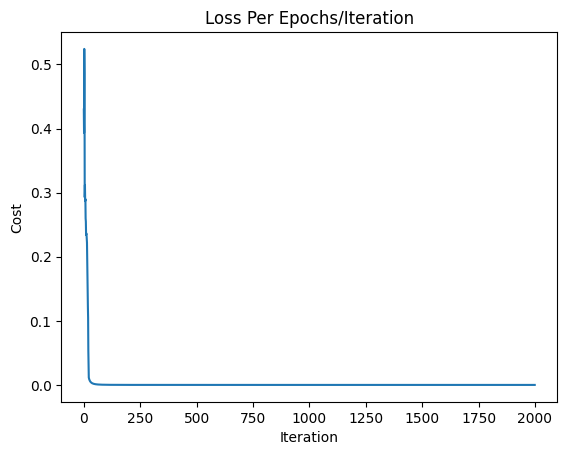


After Training:
0.9997, 0.0007
0.0005, 1.0000
1.0000, 0.9996
1.0000, 0.0006
1.0000, 0.0005
0.9996, 0.9993
0.9999, 0.9996
Training with 2 neurons and learning rate: 0.1


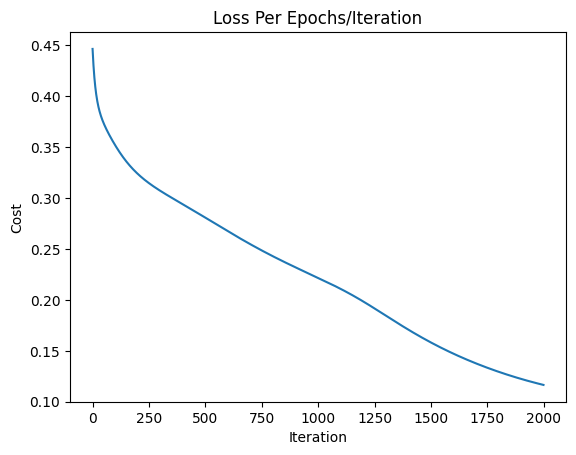


After Training:
0.9923, 0.2360
0.1674, 0.9761
0.9767, 0.5750
0.9697, 0.6315
0.9988, 0.0664
0.8749, 0.8087
0.9400, 0.7007
Training with 2 neurons and learning rate: 1.0


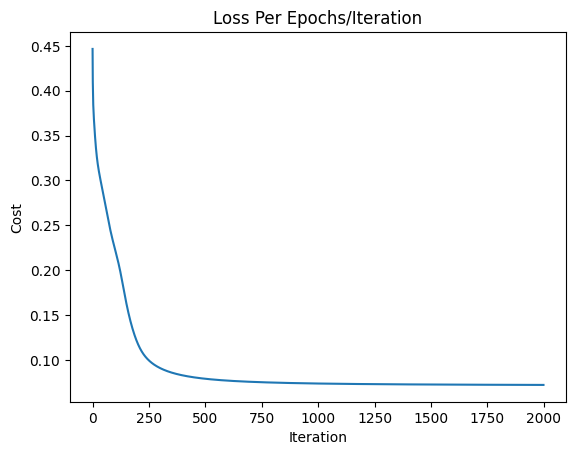


After Training:
0.9998, 0.0073
0.0206, 1.0000
0.9998, 0.5135
0.9998, 0.5177
1.0000, 0.0002
0.9863, 0.9821
0.9863, 0.9795
Training with 2 neurons and learning rate: 10.0


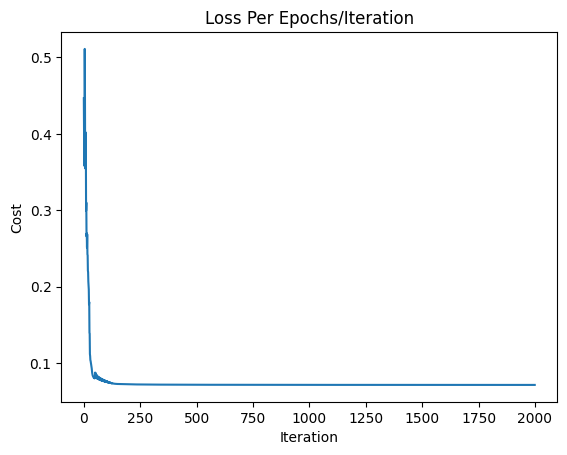


After Training:
1.0000, 0.0005
0.0020, 1.0000
1.0000, 0.5012
1.0000, 0.5017
1.0000, 0.0000
0.9986, 0.9984
0.9986, 0.9982
Training with 2 neurons and learning rate: 50.0


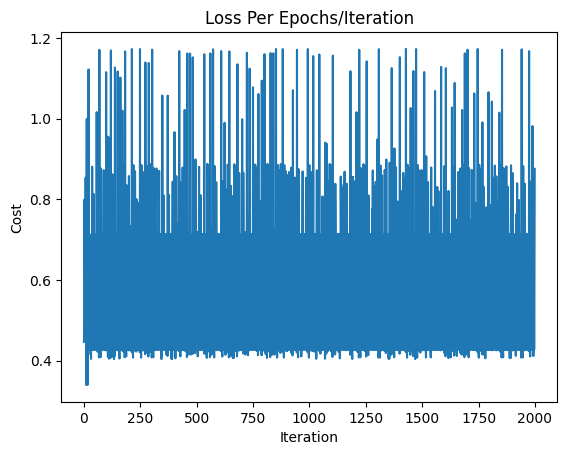


After Training:
1.0000, 0.9992
1.0000, 0.9992
1.0000, 0.9992
1.0000, 0.0000
1.0000, 0.9992
1.0000, 0.9992
1.0000, 0.9992
Training with 4 neurons and learning rate: 0.1


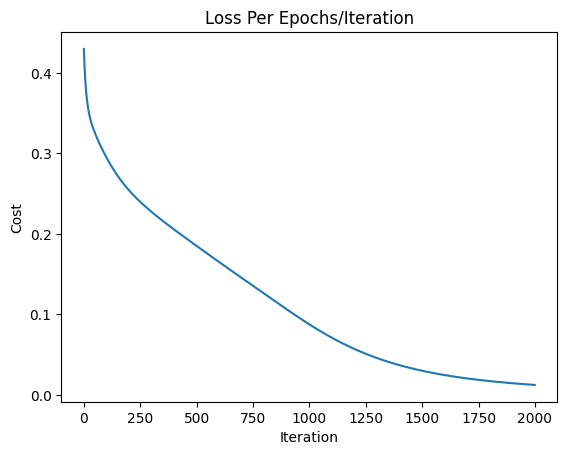


After Training:
0.9975, 0.1551
0.1006, 0.9866
0.9986, 0.8700
0.9960, 0.0759
0.9993, 0.0593
0.9095, 0.9089
0.9786, 0.9040
Training with 4 neurons and learning rate: 1.0


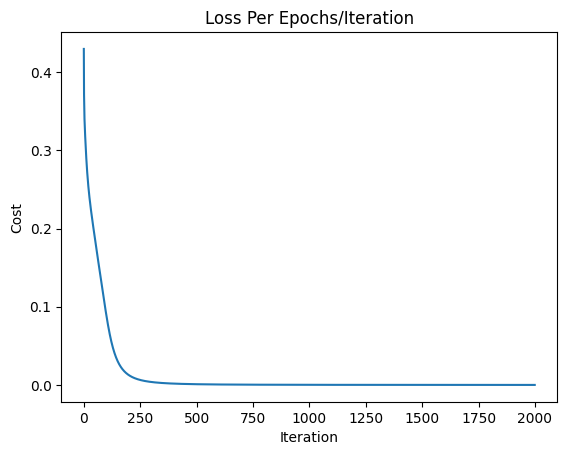


After Training:
1.0000, 0.0073
0.0052, 0.9994
1.0000, 0.9930
1.0000, 0.0048
1.0000, 0.0033
0.9953, 0.9935
0.9987, 0.9962
Training with 4 neurons and learning rate: 10.0


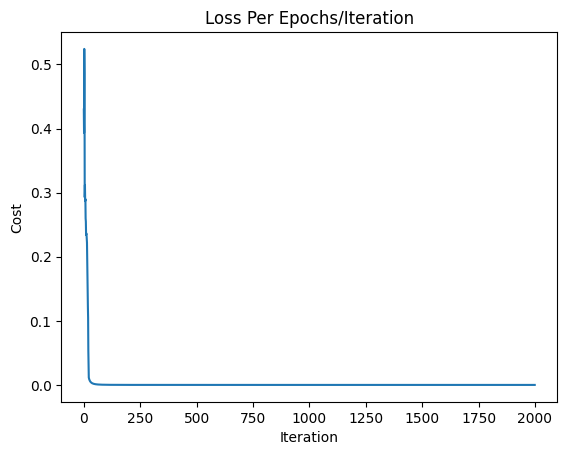


After Training:
0.9997, 0.0007
0.0005, 1.0000
1.0000, 0.9996
1.0000, 0.0006
1.0000, 0.0005
0.9996, 0.9993
0.9999, 0.9996
Training with 4 neurons and learning rate: 50.0


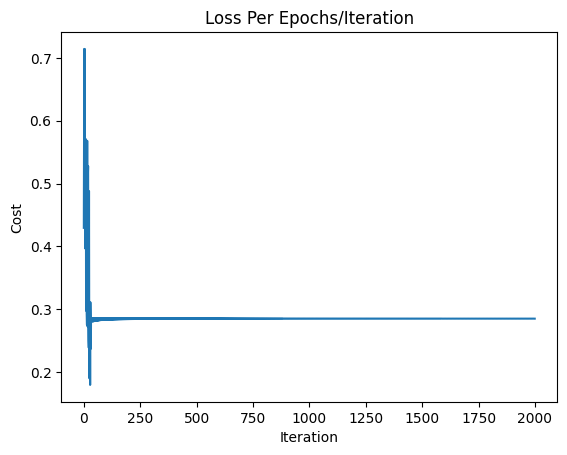


After Training:
1.0000, 0.0000
0.9993, 0.0008
1.0000, 0.9999
0.9993, 0.0008
1.0000, 0.0000
1.0000, 1.0000
1.0000, 0.9999
Training with 6 neurons and learning rate: 0.1


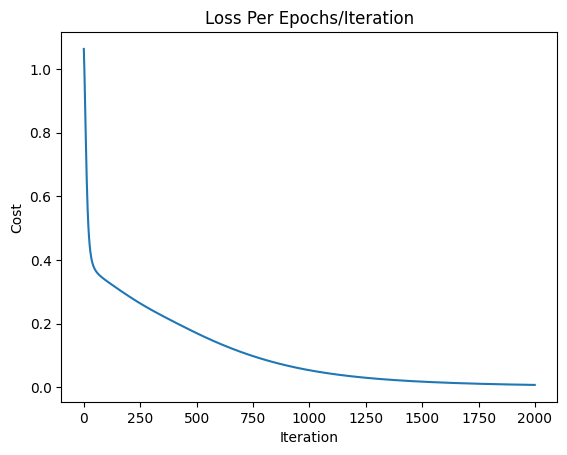


After Training:
0.9850, 0.0671
0.0693, 0.9697
0.9997, 0.9275
0.9999, 0.1440
0.9926, 0.0079
0.9476, 0.9686
0.9989, 0.8894
Training with 6 neurons and learning rate: 1.0


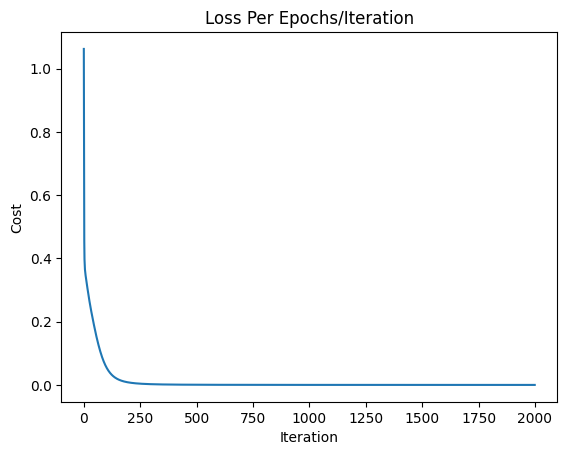


After Training:
0.9986, 0.0020
0.0039, 0.9983
1.0000, 0.9943
1.0000, 0.0089
0.9998, 0.0001
0.9972, 0.9980
0.9999, 0.9964
Training with 6 neurons and learning rate: 10.0


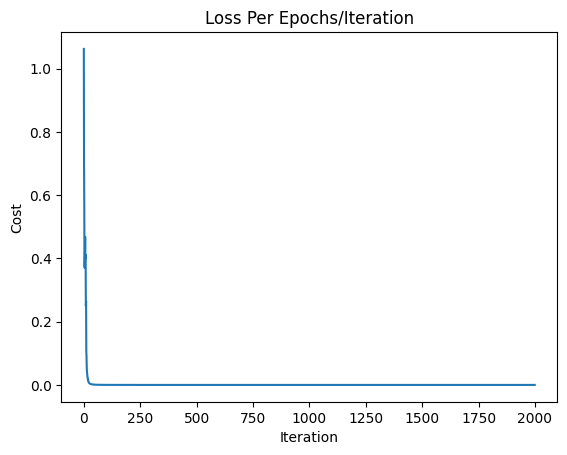


After Training:
0.9999, 0.0003
0.0007, 0.9998
1.0000, 0.9998
1.0000, 0.0005
0.9999, 0.0001
0.9996, 0.9997
1.0000, 0.9998
Training with 6 neurons and learning rate: 50.0


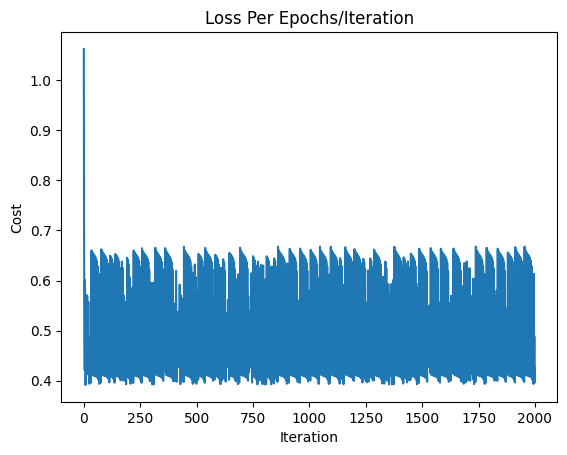


After Training:
1.0000, 0.9992
1.0000, 0.9992
1.0000, 1.0000
1.0000, 0.0002
1.0000, 0.9992
1.0000, 0.9992
1.0000, 1.0000
Training with 8 neurons and learning rate: 0.1


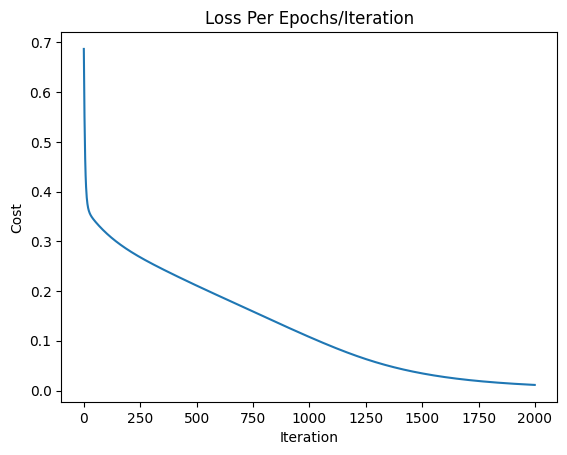


After Training:
0.9801, 0.1465
0.0806, 0.9454
1.0000, 0.8916
0.9995, 0.1433
0.9962, 0.0229
0.9328, 0.9635
0.9993, 0.9070
Training with 8 neurons and learning rate: 1.0


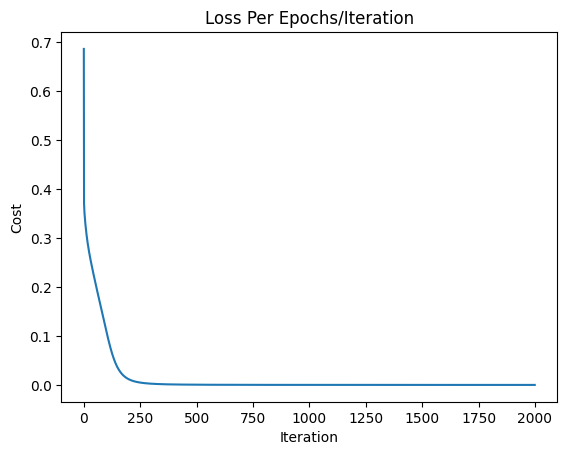


After Training:
0.9989, 0.0036
0.0042, 0.9980
1.0000, 0.9978
1.0000, 0.0045
0.9998, 0.0001
0.9961, 0.9984
1.0000, 0.9974
Training with 8 neurons and learning rate: 10.0


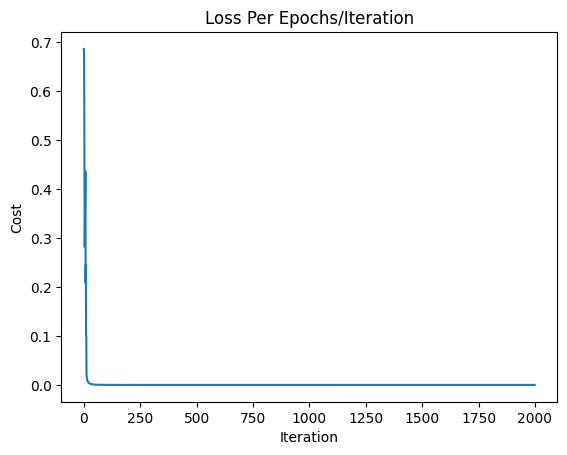


After Training:
0.9998, 0.0005
0.0006, 1.0000
1.0000, 0.9999
1.0000, 0.0005
1.0000, 0.0001
0.9995, 0.9996
1.0000, 0.9998
Training with 8 neurons and learning rate: 50.0


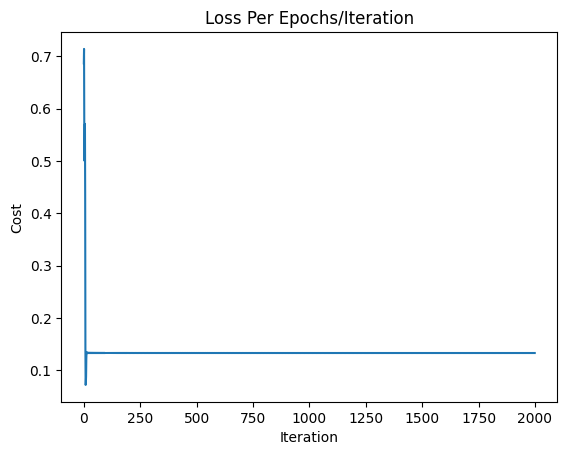


After Training:
0.9999, 0.0000
0.0004, 0.9997
1.0000, 1.0000
0.9999, 0.0348
0.9999, 0.0000
0.9999, 0.0348
0.9999, 1.0000


In [127]:
# Problem 2 - Neural Network with 3 input and 2 output
p2_mlp = MLP2(3,4,2)

p2_mlp.train_inputs = np.array([[1,1,0],
                                [1,-1,-1],
                                [-1,1,1],
                                [-1,-1,1],
                                [0,1,-1],
                                [0,-1,-1],
                                [1,1,1]])

p2_mlp.train_outputs = np.array([[1,0],
                                 [0,1],
                                 [1,1],
                                 [1,0],
                                 [1,0],
                                 [1,1],
                                 [1,1]])

xs = p2_mlp.train_inputs.T
print("\nBefore Training:\n" + p2_mlp.feedforward(xs))

epochs = 2000
learning_rate = 10.0

c = p2_mlp.train(epochs, learning_rate)
print("\nAfter Training:\n" + p2_mlp.feedforward(xs))

# Experimenting with different numbers of neurons and learning rates
neurons_options = [2, 4, 6, 8]
learning_rates = [0.1, 1.0, 10.0, 50.0]

# Define the training inputs and outputs outside the loop, so you don't have to redefine them each time
train_inputs = np.array([[1,1,0],
                         [1,-1,-1],
                         [-1,1,1],
                         [-1,-1,1],
                         [0,1,-1],
                         [0,-1,-1],
                         [1,1,1]])

train_outputs = np.array([[1,0],
                          [0,1],
                          [1,1],
                          [1,0],
                          [1,0],
                          [1,1],
                          [1,1]])

for neurons in neurons_options:
    for lr in learning_rates:
        p2_mlp = MLP2(3, neurons, 2) # Re-initialize the network for each learning rate
        p2_mlp.train_inputs = train_inputs
        p2_mlp.train_outputs = train_outputs

        print(f"Training with {neurons} neurons and learning rate: {lr}")
        c = p2_mlp.train(epochs, lr)
        print("\nAfter Training:\n" + p2_mlp.feedforward(xs))




Before Training:
0.8724, 0.1932, 0.6692
0.8487, 0.2106, 0.6641
0.8668, 0.1529, 0.7022
0.8883, 0.1205, 0.7241
0.8487, 0.2106, 0.6641
0.7469, 0.2270, 0.5332
0.7853, 0.2048, 0.5887
0.6777, 0.2279, 0.5237
0.6207, 0.4639, 0.5001
0.7007, 0.2595, 0.5291
cost =  0.13328136152731831


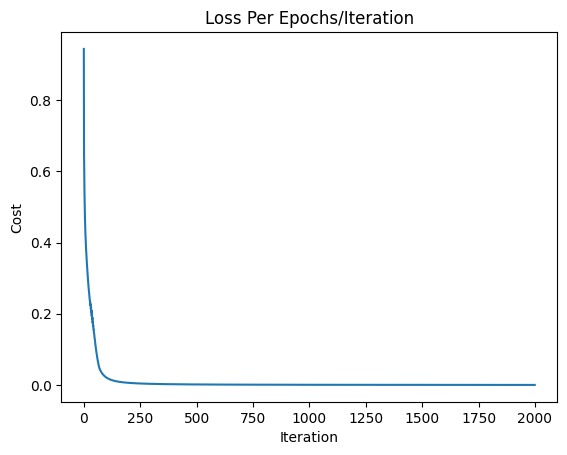


After Training:
0.9933, 0.0124, 0.0001
0.9876, 0.0055, 0.0039
0.0187, 0.9895, 0.0006
0.9875, 0.0137, 0.0001
0.9876, 0.0055, 0.0039
0.0084, 0.9837, 0.0123
0.0049, 0.9825, 0.0111
0.0027, 0.0191, 0.9856
0.0060, 0.0031, 0.9936
0.0052, 0.0030, 0.9946
cost =  0.0003082081073960437

Women Test Case:
0.0049, 0.9825, 0.0111

Men Test Case:
0.0861, 0.1089, 0.2809

Other Test Case:
0.0051, 0.0028, 0.9956


In [128]:
# Problem 3 - Transportation Mode Choice
# Possible Outputs: Bus [1,0,0] │ Train [0,1,0] │ Car [0,0,1]
# Gender: 0 = Male │ 1 = Female
# Car Ownership: 0 │ 1 │ 2 
# Travel Costs: 0 = Cheap │ 1 = Standard │ 2 = Expensive
# Income: 0 = Low │ 1 = Medium │ 2 = High

p3_mlp = MLP(4,6,3)

p3_mlp.train_inputs = np.array([[0,0,0,0], 
                                [0,1,0,1], 
                                [1,1,0,1], 
                                [1,0,0,0], 
                                [0,1,0,1], 
                                [0,0,1,1], 
                                [1,1,1,1], 
                                [1,1,2,2], 
                                [0,2,2,1], 
                                [1,2,2,2]])

p3_mlp.train_outputs = np.array([[1,0,0], 
                                 [1,0,0], 
                                 [0,1,0], 
                                 [1,0,0], 
                                 [1,0,0], 
                                 [0,1,0], 
                                 [0,1,0], 
                                 [0,0,1], 
                                 [0,0,1], 
                                 [0,0,1]])

xs = p3_mlp.train_inputs.T
print("\nBefore Training:\n" + p3_mlp.feedforward(xs))
print("cost = ", str(c[-1]))

epochs = 2000
learning_rate = 10.0

c = p3_mlp.train(epochs, learning_rate)
print("\nAfter Training:\n" + p3_mlp.feedforward(xs))
print("cost = ", str(c[-1]))

# Female Test Case:
print("\nWomen Test Case:")
test_case = np.array([1, 1, 1, 1]).reshape(4,1)
print(p3_mlp.predict(test_case))

# The next two test cases I added myself to test the network more:
# Male Test Case: 
print("\nMen Test Case:")
test_case = np.array([0, 1, 1, 1]).reshape(4,1)
print(p3_mlp.predict(test_case))

# Last test case:
# a male with two cars + expensive travel costs + high income.
print("\nOther Test Case:")
test_case = np.array([0, 2, 2, 2]).reshape(4,1)
print(p3_mlp.predict(test_case))


# Copying data to dataframe
# saving it to a csv file + seperating by commas
p3_mlp_df = pd.DataFrame(p3_mlp.train_inputs)
p3_mlp_df.to_csv('transport.csv', sep=',', index=False, header=False)

In [129]:
# Import and reading iris_data.csv into a dataframe
df = pd.read_csv('iris_data.csv', header=None)

# Last column is the output
training_outputs = df.iloc[:,-1]

# Converting the output to a one hot encoded vector
training_outputs = pd.get_dummies(training_outputs)

# Converting the dataframe to a numpy array
training_outputs = training_outputs.to_numpy()

# Convert y true and false to 1 and 0
training_outputs = training_outputs.astype(int)

# Drop last column from dataframe
df = df.drop(df.columns[[-1]], axis=1)

# Convert dataframe to numpy array
training_inputs = df.to_numpy()

# Clean up data
training_inputs = training_inputs.astype(float)


Outputs Before Training:
0.5609, 0.5688, 0.3651
0.5338, 0.5684, 0.3431
0.5606, 0.5653, 0.3601
0.5570, 0.5604, 0.3526
0.5715, 0.5666, 0.3712
0.5742, 0.5649, 0.3596
0.5791, 0.5600, 0.3628
0.5578, 0.5666, 0.3599
0.5544, 0.5586, 0.3481
0.5342, 0.5687, 0.3529
0.5597, 0.5708, 0.3668
0.5655, 0.5617, 0.3611
0.5319, 0.5691, 0.3518
0.5621, 0.5643, 0.3683
0.5648, 0.5751, 0.3797
0.5912, 0.5672, 0.3797
0.5822, 0.5676, 0.3696
0.5659, 0.5669, 0.3594
0.5552, 0.5710, 0.3562
0.5800, 0.5647, 0.3700
0.5358, 0.5707, 0.3478
0.5782, 0.5635, 0.3602
0.5908, 0.5648, 0.3852
0.5593, 0.5581, 0.3283
0.5614, 0.5553, 0.3540
0.5269, 0.5664, 0.3367
0.5654, 0.5611, 0.3450
0.5552, 0.5693, 0.3611
0.5488, 0.5712, 0.3585
0.5577, 0.5602, 0.3534
0.5460, 0.5622, 0.3463
0.5508, 0.5686, 0.3402
0.5868, 0.5663, 0.3890
0.5861, 0.5687, 0.3867
0.5342, 0.5687, 0.3529
0.5452, 0.5717, 0.3563
0.5409, 0.5760, 0.3600
0.5342, 0.5687, 0.3529
0.5619, 0.5607, 0.3557
0.5531, 0.5683, 0.3581
0.5713, 0.5665, 0.3633
0.5086, 0.5579, 0.3005
0.5741, 

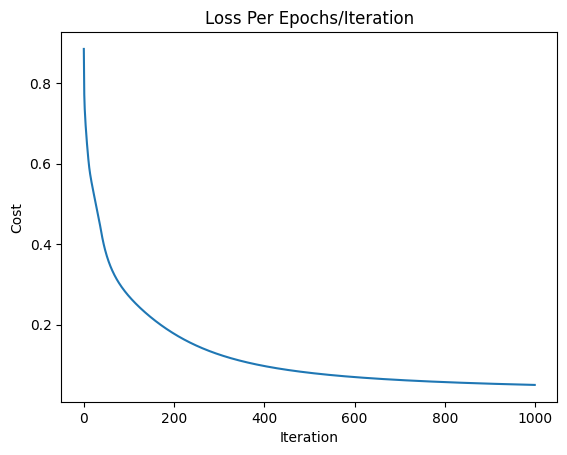

cost =  0.050631902175404635

Outputs after training:
0.9718, 0.0475, 0.0041
0.9594, 0.0630, 0.0047
0.9702, 0.0505, 0.0041
0.9632, 0.0602, 0.0045
0.9736, 0.0457, 0.0040
0.9718, 0.0476, 0.0041
0.9720, 0.0489, 0.0040
0.9688, 0.0518, 0.0042
0.9612, 0.0633, 0.0046
0.9604, 0.0620, 0.0047
0.9721, 0.0466, 0.0040
0.9678, 0.0541, 0.0043
0.9611, 0.0613, 0.0046
0.9723, 0.0488, 0.0040
0.9762, 0.0408, 0.0038
0.9768, 0.0404, 0.0038
0.9756, 0.0420, 0.0038
0.9715, 0.0478, 0.0041
0.9689, 0.0501, 0.0042
0.9741, 0.0449, 0.0039
0.9590, 0.0623, 0.0047
0.9727, 0.0467, 0.0040
0.9772, 0.0412, 0.0037
0.9559, 0.0683, 0.0048
0.9575, 0.0684, 0.0047
0.9466, 0.0776, 0.0053
0.9653, 0.0565, 0.0044
0.9697, 0.0501, 0.0042
0.9694, 0.0502, 0.0042
0.9625, 0.0611, 0.0045
0.9569, 0.0671, 0.0048
0.9651, 0.0552, 0.0044
0.9766, 0.0418, 0.0038
0.9769, 0.0406, 0.0038
0.9604, 0.0620, 0.0047
0.9701, 0.0495, 0.0041
0.9711, 0.0473, 0.0041
0.9604, 0.0620, 0.0047
0.9676, 0.0550, 0.0043
0.9681, 0.0523, 0.0043
0.9732, 0.0458, 0.0040
0.9

In [130]:
iris_mlp = MLP(4,7,3)

iris_mlp.train_inputs = training_inputs
iris_mlp.train_outputs = training_outputs

xs = training_inputs.T
print("\nOutputs Before Training:\n" + iris_mlp.feedforward(xs))
print("cost = ", str(c[-1]))

# -- Using different epochs and learning_rate here as another problem --
epochs = 1000
learning_rate = 0.8

c = iris_mlp.train(epochs, learning_rate)
print("cost = ", str(c[-1]))
print("\nOutputs after training:\n" + iris_mlp.feedforward(xs))